<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ исходных данных</a></span></li><li><span><a href="#Обработка-текста" data-toc-modified-id="Обработка-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Полина! Меня зовут Марат, и я буду твоим ревьюером.  По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<div class="alert alert-info">
Привет, Марат, спасибо за комментарии! Доработала и описала в комментариях изменения

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Полина! Давай посмотрим


 

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
!/opt/conda/bin/python -m pip install wordcloud -q

In [2]:
!pip install Pillow==9.5.0 shap -q

In [3]:
import os
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.metrics import (make_scorer, f1_score, accuracy_score,
                             confusion_matrix, roc_curve)
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     StratifiedKFold, cross_val_score)
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

import shap
from sklearn.inspection import permutation_importance
from wordcloud import WordCloud

# Загрузка необходимых ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Подготовка

### Анализ исходных данных

In [4]:
# Считаем CSV-файл с данными с помощью библиотеки pandas в датафрейм и изучим общую информацию

path = '/datasets'

try:
    # Чтение датафреймов
    comments = pd.read_csv(os.path.join(path, 'toxic_comments.csv'), index_col=0)

except FileNotFoundError:
    print('Один или несколько файлов не найдены.')

In [5]:
comments.head(5)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 


Если не знаешь - чтобы не было столбца  `Unnamed: 0` при чтении файла можно так:


    pd.read_csv(..., index_col=0)

    
(`Unnamed: 0` появляется при не совсем корректном сохранении файла)    


Unnamed: 0 это "след" старых индексов. Если ты уберёшь первые 10 примеров и своего датасета, сохранишь его, а потом откроешь,  то появится столбец Unnamed: 0 начиная с цифры 9, и появится новый индексы начиная с нуля 


Но это мелочь,  даже не нужно ничего исправлять. Просто знай, чтобы увидев такое в чужом коде не удивляться что бы это могло означать

<div class="alert alert-info">
Обновила

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

In [7]:
comments.sample(3)

,text,toxic
11832,Applicability to Wikipedia \n\nTo what degree ...,0
82319,"""\n\n krill.jpg is still used in articles \n\n """,0
46089,As long as the time frpm Big Bang is identical...,0


In [8]:
# Удалим дубликаты комментов если есть (нет)
comments = comments.drop_duplicates(subset=['text'])
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Данные изучены 

<div class="alert alert-warning">

Совет: 




- стоило еще проверить на сбалансированность классов в таргете это важная информация при моделировании и  корректной оценки модели. и к нему график можно, ведь красивый, хорошо оформленный график может быть украшением проекта. Без учёта дисбаланса  предсказания модели могут быть смещены в сторону более часто встречающегося класса.  Для начала можно посмотреть [тут](https://pudie.ru/articles/707332/)


- нет никакого промежуточного вывода в конце раздела, и никак он не выделен    
 



- можно также посчитать количество слов в предложений,  длину слов в твите, опять же в разбивке по Таргету.  Если будут какие-то сильные отличия, возможно из-за этого стоит сгенерировать дополнительные признаки для наших моделей. Или например можно использовать библиотеку SentimentIntensityAnalyzer для оценки сантиментов, и посмотреть насколько хорошо ее оценки корелирует с нашими таргетами
   
   
- когда мы работаем с текстами, describe итп описательные статистике не использовать, но можно провести частотный анализ текста.  Предлагаю для этого использовать [облако слов](https://habr.com/ru/post/517410/) - чтобы получить общее представление о тематике и о наиболее часто встречаемых словах в токсичных и нетоксичных твитах (в облаке уже автоматически будут убраны стоп слова). Кроме того графики, рисунки делают проект визуально интересней
   
   
В тренажере облако импортируем так

    !/opt/conda/bin/python -m pip install wordcloud 


или

    !/opt/conda/bin/python -m pip install wordcloud==1.8.2.2  


И возможно дополнительно надо будет сделать



    !pip install --upgrade Pillow  (попробуй версию 9.5.0)

     

<div class="alert alert-info">
Добавила анализ и выводы ниже

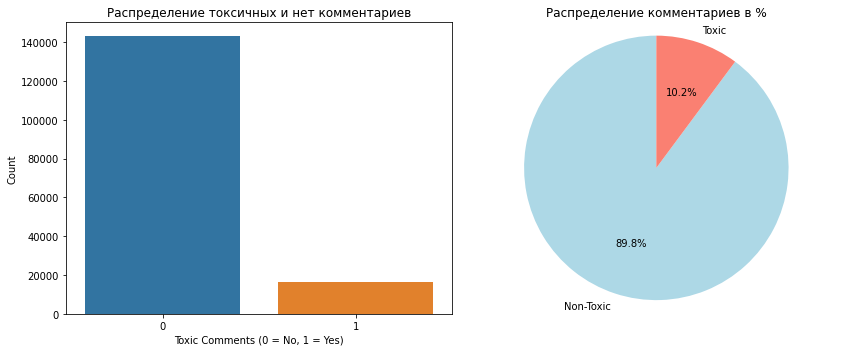

In [9]:
# Проверка на сбалансированность классов в таргете
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Бар-чарт
sns.countplot(x='toxic', data=comments, ax=ax[0])
ax[0].set_title('Распределение токсичных и нет комментариев')
ax[0].set_xlabel('Toxic Comments (0 = No, 1 = Yes)')
ax[0].set_ylabel('Count')

# Пай-чарт
percentage = comments['toxic'].value_counts(normalize=True) * 100
ax[1].pie(percentage, labels=['Non-Toxic', 'Toxic'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
ax[1].axis('equal')
ax[1].set_title('Распределение комментариев в %')

plt.tight_layout()
plt.show()

In [10]:
# Подсчет количества слов и длины слов в комментариях по таргету
comments['word_count'] = comments['text'].apply(lambda x: len(x.split()))
comments['char_count'] = comments['text'].apply(lambda x: len(x))

# Группировка по таргету
comments.groupby('toxic').agg({'word_count': ['mean', 'std'], 'char_count': ['mean', 'std']})

word_count              char_count            
            mean         std        mean         std
toxic                                               
0      68.857665   98.097420  403.956585  585.914845
1      52.677314  106.772843  302.932411  618.647890

<b> По результатам видим: </b>
- 90% коментариев в данных - не токсичные, используем дальше в выборках
- в среднем в токсичных комментариях меньше слов и знаков

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Красота

(Видимо чтобы обидеть человека много слов не нужно)
 

In [11]:
# Оценка сентиментов с SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
comments['sentiment'] = comments['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
# Проверка корреляции между сентиментами и таргетами
comments[['toxic', 'sentiment']].corr().iloc[0, 1]

-0.2949356684240629

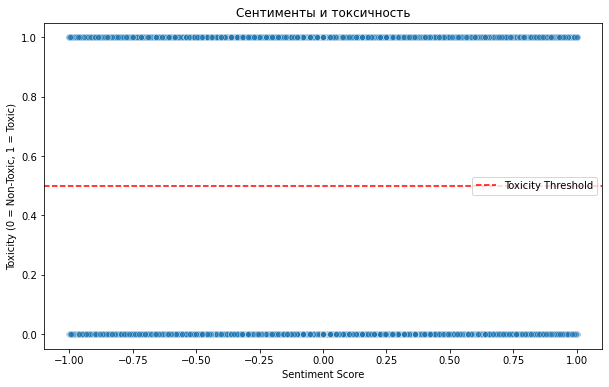

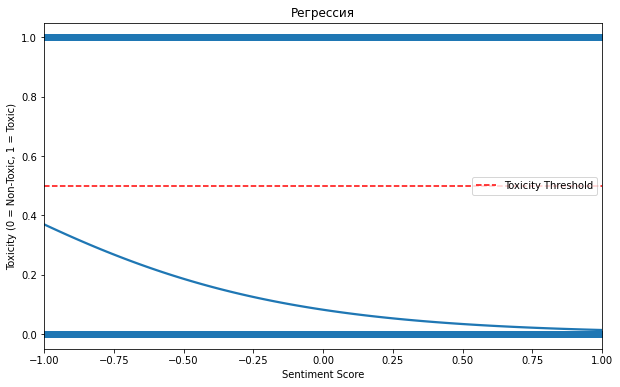

In [13]:
# Диаграмма рассеяния (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments, x='sentiment', y='toxic', alpha=0.6)
plt.title('Сентименты и токсичность')
plt.xlabel('Sentiment Score')
plt.ylabel('Toxicity (0 = Non-Toxic, 1 = Toxic)')
plt.axhline(0.5, color='red', linestyle='--', label='Toxicity Threshold')
plt.legend()
plt.show()

# Добавление линии регрессии
plt.figure(figsize=(10, 6))
sns.regplot(data=comments, x='sentiment', y='toxic', logistic=True, ci=None, scatter_kws={'alpha':0.6})
plt.title('Регрессия')
plt.xlabel('Sentiment Score')
plt.ylabel('Toxicity (0 = Non-Toxic, 1 = Toxic)')
plt.axhline(0.5, color='red', linestyle='--', label='Toxicity Threshold')
plt.legend()
plt.show()

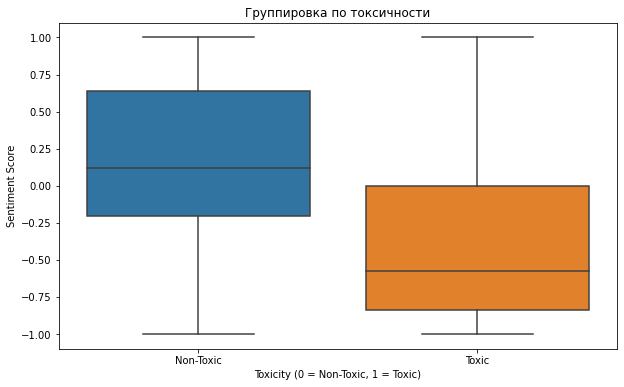

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=comments, x='toxic', y='sentiment')
plt.title('Группировка по токсичности')
plt.xlabel('Toxicity (0 = Non-Toxic, 1 = Toxic)')
plt.ylabel('Sentiment Score')
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.show()

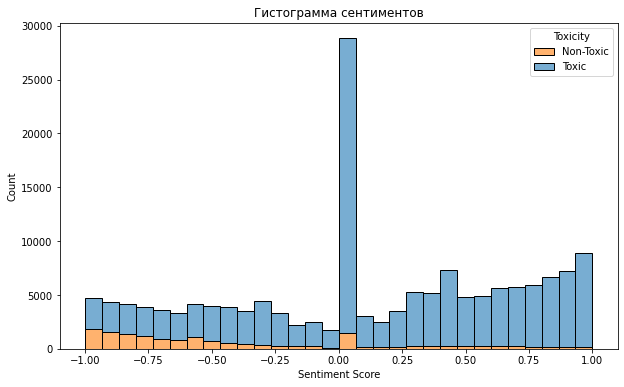

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=comments, x='sentiment', hue='toxic', multiple='stack', bins=30, alpha=0.6)
plt.title('Гистограмма сентиментов')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.legend(title='Toxicity', labels=['Non-Toxic', 'Toxic'])
plt.show()

Значение корреляции между сентиментами и токсичностью: -0.294 говорит о том, что существует умеренная отрицательная корреляция, более низкие значения сентимента (более отрицательные оценки) связаны с большей вероятностью того, что комментарий будет токсичным.  
Также по графикам видим, что токсичные комментарии имеют более негативные сентименты.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Выглядит так, что можно попробовать в качестве дополнительного признака у нашей модели


 

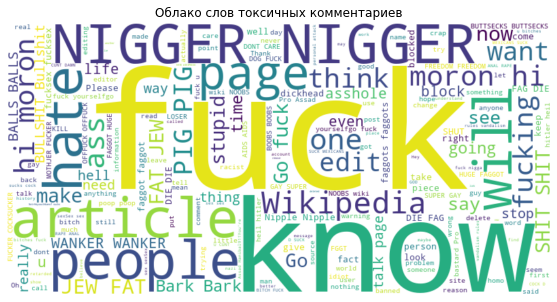

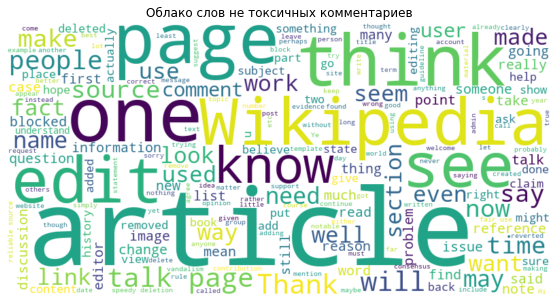

In [16]:
# Частотный анализ текста - облака слов для токсичных и нетоксичных комментариев
toxic_text = ' '.join(comments[comments['toxic'] == 1]['text'])
non_toxic_text = ' '.join(comments[comments['toxic'] == 0]['text'])

# Облако слов для токсичных комментариев
toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_text)
plt.figure(figsize=(10, 5))
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов токсичных комментариев')
plt.show()

# Облако слов для нетоксичных комментариев
non_toxic_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_text)
plt.figure(figsize=(10, 5))
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов не токсичных комментариев')
plt.show()

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


Красиво, хотя слова некрасивые. И сразу видны ключевые слова для разделения 




    
<div class="alert alert-warning">


Совет 🤔:
    
    
    
как видишь есть дубликаты, можно посмотреть как их убрать collocations=False:    
    
https://stackoverflow.com/questions/43954114/python-wordcloud-repetitive-words



<b>По результатам анализа данных:</b>
- в данных больше не токсичных комментариев,
- токсичные и не токсичные комментарии в целом похожи по длине и количеству знаков, в токсичных комментариях немного меньше слов и знаков,
- построили облака слов для токсичных и не токсичных комментов

### Обработка текста

In [17]:
# Загружаем SpaCy
#nlp = spacy.load("en_core_web_sm")

# Настраиваем tqdm для отображения прогресса
#tqdm.pandas()

#def preprocess_text(text):
    # Обработка текста с помощью SpaCy
#    doc = nlp(text.lower())
    # Лемматизация и удаление стоп-слов, знаков препинания и слов без латиницы
#    tokens = [
#        token.lemma_ for token in doc 
#        if token.is_alpha and not token.is_stop and all(char.isascii() for char in token.text)
#    ]
    # Соединение токенов в одну строку
#    processed_text = ' '.join(tokens)
#    return processed_text

# Пример для тестирования работы функции
#sentence1 = "The striped bats, are hanging 45 on their feet for best"
#sentence2 = "you should be ashamed of yourself went worked"
#df_my = pd.DataFrame([sentence1, sentence2], columns=['text'])

# Применяем функцию на тестовых данных с прогрессом
#print(df_my['text'].progress_apply(preprocess_text))

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



- WordNetLemmatizer  рабочий вариант, но у него есть особенности, для корректной работы ему нужно передавать не просто слово, но и POS-тег (Part of Speech, части речи). Набираемся ума-разума [тут](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/) )  Обрати внимание на функцию `get_wordnet_pos`. Сразу хочу предупредить, что если делать Лемматизацию правильно, сучетом постегов, то время может занять полчаса-час. Так что не удивляйся (вообще советую сохранить результаты Лематизации в каком-то файлике, чтобы каждый раз не тратить на это много времени)


- Также не забываем провести очистку данных.  Знаки препинания, цифры - убираем.  Вообще можно оставить только слова на латинице    
    
    
- ['<end>'] ['<start>'] А зачем тебе это? И можно ведь сразу добавить в функцию '.join(x), а не делать это ниже







 


<div class="alert alert-warning">


Совет: 




- лемматизацию можно было сделать с помощью SpaCy лемматизатором и прямо скажем как инструмент он более удобен и универсален, не нужно заморачиваться с токенизацией и учётом пос тегов




- Чтобы сэкономить время, и убедиться что всё отработало нормально, берёшь парочку предложений, создаёшь dataframe
    
    
    sentence1 = "The striped bats are hanging on their feet for best"
    sentence2 = "you should be ashamed of yourself went worked"
    df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
    print(df_my)


    print(df_my['text'].apply(func))
    
    
    
И тестируешь не нем, должно получиться 
    
    
    
    striped  ------> strip, went -------> go  



Если всё получилось, то можно использовать на всём датасете

<div class="alert alert-info">
Поменяла WordNetLemmatizer на SpaCy, потестировала, striped получился stripe, но вроде похоже

In [18]:
#comments['processed_text'] = comments['text'].progress_apply(preprocess_text)
#comments[['processed_text']].to_csv('toxic_comments_pky.csv')

processed_comments = pd.read_csv('toxic_comments_pky.csv', index_col=[0])
comments = comments.join(processed_comments)

In [19]:
comments.sample(5)

,text,toxic,word_count,char_count,sentiment,processed_text
129108,""", 18 December 2015 (UTC)\nWP:DUE yes. It has ...",0,46,247,0.2893,december utc wp yes place protocol sure hunch ...
113182,"""\n\n Removal of Patroclus Image per New Infor...",0,186,1174,-0.7184,removal patroclus image new information image ...
129451,At least 95% of the stories on this incident w...,0,57,346,0.6124,story incident false claim white spontaneously...
11395,There was a documentary shown on Mediacorp Cha...,0,42,249,0.7391,documentary show mediacorp channel hotel new w...
23957,"2:00, 4 February 2015 (PST)",0,5,27,0.0000,february pst


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


 

- Плюс за использование apply, неэффективные циклы нам ни к чему.


- Да, всегда лучше проверить что получилось  в итоге, так всегда будет возможность поправить ошибку

<div class="alert alert-warning">


Совет: 


    
- попробуй .progress_apply, делает что .apply, но еще и показывает на какой итерации находится процесс.  

Для некоторых версий, чтобы заработал .progress_apply предварительно нужно сделать:
    
    
    from tqdm.notebook import tqdm
    tqdm.pandas()
    

И cудя по всему импорты нужно засунуть внутрь функции
 

<div class="alert alert-info">
Поменяла .apply на .progress_apply, работает

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

In [20]:
# Удалим пустые строки
comments[comments['processed_text'].isna()]

,text,toxic,word_count,char_count,sentiment,processed_text
177,"86.29.244.57|86.29.244.57]] 04:21, 14 May 2007",0,5,46,0.000,NaN
627,Seems we both have some.,0,5,24,0.000,NaN
824,"16, 7 May 2007 (UTC)TimySmidge 21:",0,6,34,0.000,NaN
1719,"Thivierr|Rob]] 23:52, 27 May 2006",0,5,33,0.000,NaN
2091,"No, it doesn´t.80.228.65.162",0,3,28,-0.296,NaN
...,...,...,...,...,...,...
152700,SAME FOR THIS 166.137.240.20,0,4,28,0.000,NaN
153198,which is OVER 9000 OVER 9000 OVER 9000 OVER 90...,0,296,1478,0.000,NaN
153499,http://en.wikipedia.org/w/index.php?title=Cras...,0,6,119,0.000,NaN
155625,"If you have more to say, put",0,7,28,0.000,NaN


In [21]:
comments = comments.dropna(subset=['processed_text', 'toxic'])
comments[comments['processed_text'].isna()]

,text,toxic,word_count,char_count,sentiment,processed_text


In [22]:
comments['toxic'].value_counts()

0    142866
1     16175
Name: toxic, dtype: int64

## Обучение

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:


- .fit_transform на train датасете, .transform на test/valid. Вроде все верно, но после ты подаешь tf_idf_train в GridSearchCV или cross_val_score и он внутри себя разбивая его на тренировочный и валидационный датасет, получается подглядывание в будущее (утечка данных). Решение в использовании pipeline, ниже распишу

 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    
нет никакого перебора гиперпараметров,  но при этом Откуда то взялись   learning_rate=0.1, depth=6. Все эти значения мы находим   
 
    
Есть два варианта исправить красное:
    
    
1. Создать валидационный датасет, найти по нему лучшую модель (не по дефолтным значениям, а добавить какой то перебор в цикле).  
    
    
2.  Можно вместо цикла использовать sklearn-ий встроенный функционал GridSearch. В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку, лучшую метрику автоматом сохранят в best_score_, а лучшую модель (переобученная уже на полном наборе данных) будет хранить в best_estimator_, данные обучения положит в cv_restult_. А главное  он сделает несколько разбиений на train / validation выборки (кросс-валидация), тем самым поборется с рандомом, когда на валидации получен хороший результат только изза удачного сплита. 

А еще лучше использовать связку GridSearchCV + pipeline. 

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), это тема которая сразу затрагивает кроссвалидацию, тюнинг "векторайз", подбор гиперпараметров модели и о том что код стоит делать компактным.
    
    
- в TfidfVectorizer(stop_words=stopwords) у тебя по умолчанию ngram_range=(1, 1), тут можно подбирать разное число n- грамм (и другие параметры), максимизируя метрику, но как объединить перебор по ngram_range с обучением моделей, чтобы не делать это по отдельности или с использованием цикла?! pipeline! Готовый [пример для работы с текстами](https://medium.com/@yoni.levine/how-to-grid-search-with-a-pipeline-93147835d916). Всё что нужно там есть, хотя очень лаконично. Можешь погуглить по:


    
    pipeline nlp gridsearchcv
    
    
- как избежать ошибки подглядывания в будущее, когда мы предварительно работаем с данными (шкалирование, нормализация, TfidfVectorizer итп итд)? pipeline! особенно это важно, когда мы используем кроссвалидацию. Для TfidfVectorizer делаеь .fit (обучаемся) на train, а transform на test, точно также нужно сделать для валидационной выборки. Но GS делает валидационные внутри себя, спрашивается как добраться до них и избежать подглядывания в будущее? Казалось бы никак, но нет! Pipeline! ) 
    
    
- pipeline позволяет делать наш код компактней и читабельней, это большой плюс, когда код будет раздуваться   



В общем если сделать GS+pieline будет вообще хорошо )  
    
     

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка: 

- Все верно, логика моделирования не нарушена, тут тестируем только лучшую модель отобранную на валидации,  только тебя не смутила такая большая разница в метриках?  В общем обрати внимание что такое .score

<div class="alert alert-warning">



Совет: 


Что может помочь добиться лучшего результата (от простого)? 

 

- можно поиграться [порогом](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/). Таким образом можно поднять метрику на процент - полтора
    


    
- попробовать другие модели. проект своеобразный выбор между вычислительными ограничениями (много примеров, расчеты могут затянуться) и задачей получить хорошую метрику. С этой точки зрения  интересная [моделька](https://medium.com/geekculture/passive-aggressive-algorithm-for-big-data-models-8cd535ceb2e6) (открывается с помощью VPN) [или](https://datafinder.ru/products/passivno-agressivnyy-klassifikator-v-mashinnom-obuchenii). Она считается очень шустрой     
    


- использование предбученной модели Берта, выбрав соответствующую модель и используя полученные эмбединги, даже на небольшом тренировочном датасете можно обучить модель, которая на test покажет хорошую метрику. В этом случаи можно сразу получить метрику > 0.95 (при правильно выбранной модели)



<div class="alert alert-info">
Добавила pipeline с GridSearch, модель PassiveAggressiveClassifier и StratifiedKFold чтобы учесть дисбаланс в выборках

In [23]:
X = comments['processed_text']
y = comments['toxic']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Определяем Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('classifier', LogisticRegression(max_iter=200)) 
])
# Параметры для GridSearch
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  
    'classifier': [LogisticRegression(max_iter=200), 
                   LinearSVC(max_iter=200),
                   PassiveAggressiveClassifier(max_iter=50)
                  ]}
#                   ,CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)]

In [25]:
# Используем StratifiedKFold для учета дисбаланса по целевому признаку
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
%%time
# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

CPU times: user 13min 56s, sys: 4min 15s, total: 18min 12s
Wall time: 18min 12s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.7,
                                                        stop_words='english')),
                                       ('classifier',
                                        LogisticRegression(max_iter=200))]),
             n_jobs=-1,
             param_grid={'classifier': [LogisticRegression(max_iter=200),
                                        LinearSVC(max_iter=200),
                                        PassiveAggressiveClassifier(max_iter=50)],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             return_train_score=True, scoring='f1')

In [27]:
best_model = grid_search.best_estimator_
print(f'Лучшая модель: {best_model.named_steps["classifier"].__class__.__name__} с F1 Score: {grid_search.best_score_:.2f}')

Лучшая модель: PassiveAggressiveClassifier с F1 Score: 0.78


In [28]:
# Лучшие параметры и значение f1 для тренировочной выборки
best_f1_train = grid_search.best_score_
print("Лучший f1 на тренировочной выборке:", best_f1_train)

# Предсказания на тестовой выборке
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Вычисление f1 для тестовой выборки
f1_test = f1_score(y_test, y_pred_test)
print("Лучший f1 на тестовой выборке:", f1_test)

Лучший f1 на тренировочной выборке: 0.7841158093525111
Лучший f1 на тестовой выборке: 0.7848770018160804


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:


    
    
Отличная работа, использование связки GridSearchCV + pipeline это уже другой уровень 
    
    
    
    
<div class="alert alert-warning">


Совет:  


    
    
чтобы отточить технику можно было ещё сделать  feature_engenering (это когда мы создаём собственные признаки. Во многих случаях это более эффективный способ повысить нашу метрику. Опять же для данного проекта это особо не работает,  но можно было попрактиковаться.  Например использовать результаты SentimentIntensityAnalyzer    


 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет: 


   
 

Можно оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html), [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html), shap
    
    
    
Полезно чтобы модель не выглядела чёрным ящиком   

<div class="alert alert-info">
Попробовала сделать shap анализ важности признаков - падает kernel

 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Совет: 

Тогда можно было взять логистическую регрессию (Не знаю есть такое у PassiveAggressiveClassifier), и получаем список слов    
    
    
    
    words = Твоя модель.best_estimator_.named_steps['Имя викторизатора'].get_feature_names_out()

    
    
    
Получаем коэффициенты важности (для логистической регрессии)   
    
    
    
    weights = Твоя модель.best_estimator_.named_steps['имя модели'].coef_[0]



 

А потом можно построить такой-то красивый график с помощью     seaborn

 
    
Вот так ядро точно не упадёт    

In [ ]:
# Создаем объект SHAP Explainer
# explainer = shap.Explainer(best_model.named_steps['classifier'], \
#                            best_model.named_steps['tfidf'].transform(X_train[:100]))

# Применяем SHAP к тестовым данным
# shap_values = explainer(best_model.named_steps['tfidf'].transform(X_test[:100]))

# Визуализация значений SHAP для первых нескольких примеров
# shap.summary_plot(shap_values, feature_names=best_model.named_steps['tfidf'].get_feature_names_out())

## Выводы

В рамках задачи по созданию инструмента для модерации комментариев в интернет-магазине «Викишоп» был разработан и обучен классификатор для определения токсичных и позитивных комментариев. 

Мы исследовали несколько моделей и использовали метод кросс-валидации для оценки их качества по метрике F1. 
В результате сравнения различных подходов была выбрана модель PassiveAggressiveClassifier с f1: 0.78. 

Мы рекомендуем внедрить модель PassiveAggressiveClassifier для автоматического определения токсичных комментариев и отправки их на модерацию, что позволит улучшить качество сообщений на платформе и создать более комфортную среду для пользователей.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Полина, у тебя старательно выполненная работа, все четко, осмысленно. 



Нет проблем с комментированием кода - всё что ты делаешь понятно
 

Логика моделирования не нарушена 


Так как число ошибок небольшое, можешь усложнить проект:



 
- попробуй использовать связку GS+pipeline




- попробуй очень современный и модный сейчас подход с использованием  Берта. Есть несколько вариантов, самый эффективный - это использовать эмбединги (как замена TFIDF) для этого есть уже готовый код в тренажёре (в этом случае разрешается сильно порезать датасет, а если еще и использовать GPU в Colab код можно прогнать за полчаса).



- для красивой  визуализации можешь построить облако для токсичных и нетоксичных комментариев



- чтобы заглянуть внутрь модели, можешь посмотреть какой из признаков является наиболее важный для логистической регресси (должно получиться слово fuck)   

 


Обязательное к исправлению:

 

- WordNetLemmatizer используем с POS - тег, и не забываем провести очистку текста от не нужного, у нас ведь и без того огромное пространство признаков создаётся 
 


- нет перебора гиперпараметров (это можно сделать с помощью вручную прописанных циклов либо с помощью GridSearchCV)

 

- считаем нужную метрику на тестовой 




Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://t.me/renat_alimbekov \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
https://transformer.huggingface.co/ - поболтать с трансформером \
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html 


Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .

Если нравится смотреть и слушать то есть целый курс на Ютубе https://www.youtube.com/watch?v=qDMwIQRQt-M&list=PLEwK9wdS5g0qksxWxtE5c2KuFkIfUXe3i&index=1



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено,   желтые советы использованы,    (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы   были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней. Единственное Жаль что не попробовала Берт, в плане кода его реализация даже проще TFIDF, зато Метрика взлетела бы
  
  
Отличная работа Полина. Желаю успехов в дальнейшей учебе!

 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны